<a href="https://colab.research.google.com/github/KingNam/Hongong_ml_dl/blob/main/6_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 군집 알고리즘 (Clustering Algorithm)



### 1) 비지도 학습

타깃이 없을 때 사용하는 머신러닝 알고리즘. 


In [ ]:
# 코드 쉘에서 '!' 문자로 시작하면 코랩은 리눅스 쉘 명령으로 이해한다. 
# 영어 대문자 O 임 
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-08-16 11:00:46--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-08-16 11:00:47--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-08-16 11:00:47--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
print(fruits[0,0,:])
print(fruits[0])
print(fruits[0].shape)

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(100, 100)


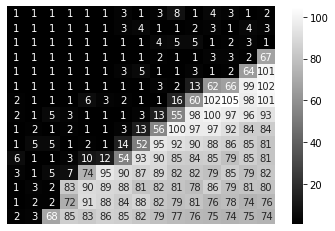

In [ ]:
# 중간에서 혼자 연습
# 픽셀 데이터는 어떻게 생긴건지 간단히 공부해보았다.
# 좌표위에 픽셀 값이 올라가있는 데이터였음.
# 아직 궁금한점 (2021/08/16)
# 100개 좌표를 한번에 보고 싶은데 사이즈 조절을 어떻게 해야하나?
# figsize, set_size_inchs 로 불가능
sample = fruits[0]
sample.shape

import seaborn as sns
sns.heatmap(sample[10:25,10:25], annot = True, fmt='d', cmap = 'gray')
plt.axis("off")
plt.show()

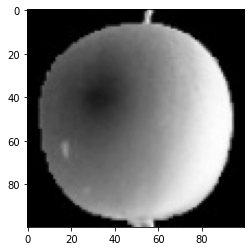

In [ ]:
# 맷플롯립의 imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 쉽게 그릴 수 있다.
plt.imshow(fruits[0],cmap ='gray')
plt.show()

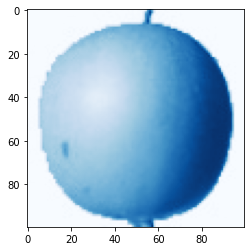

In [ ]:
plt.imshow(fruits[0],cmap ='Blues')
plt.show()

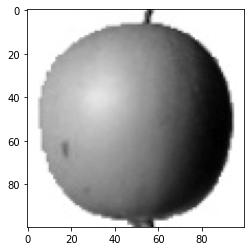

In [ ]:
# cmap를 'gray_r'로 지정하면 우리가 원하는 것을 목표로 하여 볼 수 있음. 
# 그림에서 밝은 부분이 0에 가깝고 
#          짙은 부분이 255에 가깝다
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

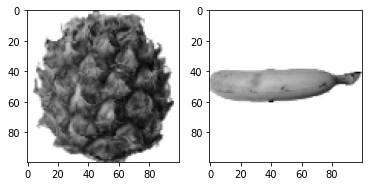

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show()

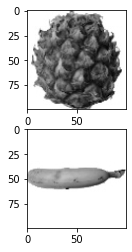

In [ ]:
fig, axs = plt.subplots(2,1)
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show()

### 2) 픽셀값 분석하기

사용하기 쉽게 fruits 데이터를 사과, 파인애플, 바나나로 각각 나누어보자. 넘파이 배열을 나눌 때 $ 100 \times 100 $ 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만든다. 이러면 이미지로 출력하긴 어렵지만 배열을 계산할 때 편리하다.

In [ ]:
# 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 사용
# 첫번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당함.
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)
print(apple.shape)

(100, 10000)


In [ ]:
# apple, pineapple, banana 배열에 들어 있는 샘플의 픽셀 평균값을 계산해보자.
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [ ]:
# 궁금증 공부 
# 사괴의 경우 4각 끝 값은 1이라고 예상되는데 어떻게 평균이 88이 나올 수 있을까
print(apple[0].max())
print(apple[0].sum())

# 사진 한장안의 픽셀값을 전부 더했기 때문에 883346 이라는 값이 나올 수 있었다.
# 끝 값의 100개 합이 아니고 1번 ~ 10000번 픽셀 값의 합이기 때문에 가능! 
# 그렇다면 애플의 합은 몇일까
print(apple.sum())

241
883346
92987736


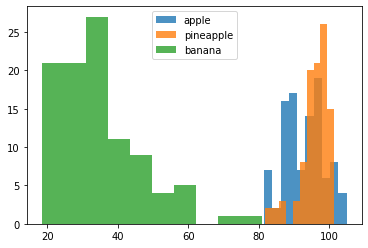

In [ ]:
# 각 과일의 픽셀 평균 히스토그램을 그려보자
plt.hist(np.mean(apple,axis=1),alpha=0.8)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

히스토그램을 보면 바나나 사진의 평균값은 40 아래에 집중되어 있음,

그림을 통해서 바나나 vs 사과, 파인애플은 구별 가능하지만 사과 vs 파인애플은 구별이 불가능하다.



픽셀별 평균값 히스토그램을 통해 비교해보자

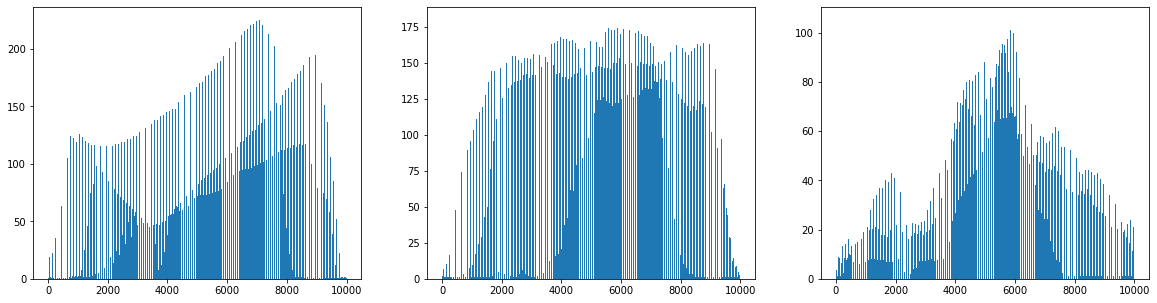

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].bar(range(10000), np.mean(apple,axis=0))
axs[1].bar(range(10000), np.mean(pineapple,axis=0))
axs[2].bar(range(10000), np.mean(banana,axis=0))

# 사과, 파인애플, 바나나
plt.show()

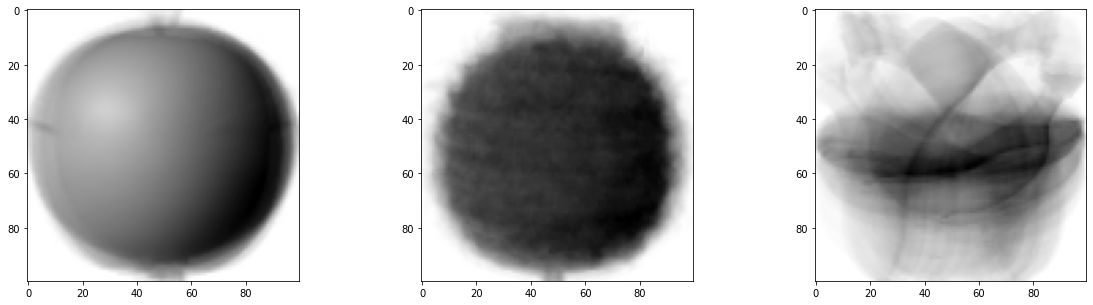

In [ ]:
# 픽셀 평균값을 100 x 100 크기로 바꿔 이미지처럼 출력하여 위 그래프와 비교하면 더 좋다.
# 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있다.
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)

# subplot 배열 생성
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

위 이미지와 같은 사진을 골라내면 사과, 파인애플, 바나나를 분류 할 수 있지 않을까?

### 3) 평균값과 가까운 사진 고르기

사과 사진의 평균값인 apple_mean과 가장 가까운 사진을 골라보자.

fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값 오차의 평균값을 계산한다.

In [ ]:
abs_diff_app = np.abs(fruits - apple_mean)
abs_mean_app = np.mean(abs_diff_app, axis=(1,2))
print(abs_diff_app.shape)
print(abs_mean_app.shape)

(300, 100, 100)
(300,)


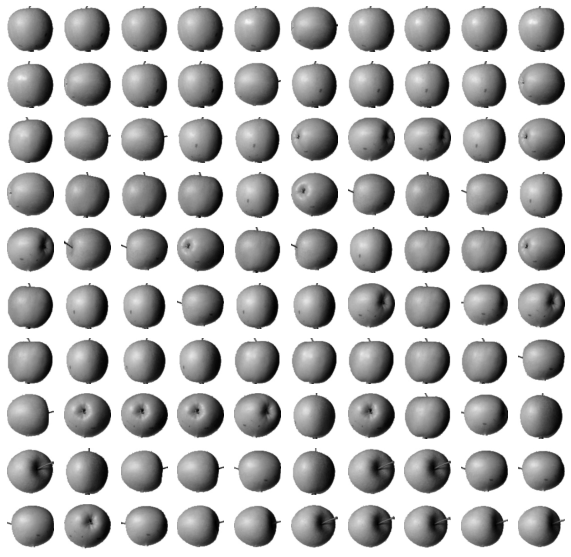

In [ ]:
# 이 값이 가장 작은 순서대로 100개를 골라 보자.
# apple_mean 과 오차가 가장 작은 샘플 100개를 고른다.
apple_index = np.argsort(abs_mean_app)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

(300, 100, 100)
(300,)


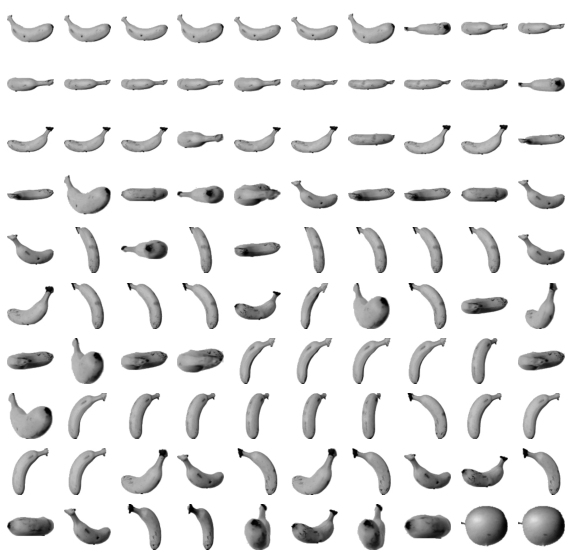

In [ ]:
# page.302 2번
abs_diff_banana = np.abs(fruits - banana_mean)
abs_mean_banana = np.mean(abs_diff_banana, axis=(1,2))
print(abs_diff_banana.shape)
print(abs_mean_banana.shape)

banana_index = np.argsort(abs_mean_banana)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

# 2. k- 평균 군집 알고리즘 (K-Means Clustering Alogrithm)

k 개의 평균을 중심으로 샘플을 Clustering 하는 알고리즘

작동순서는 아래와 같다.

1. 무작위로 K개의 클러스터 중심을 정합니다.

2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 클러스터의 샘플로 지정한다.

3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.

4. 클러스터 중심에 변화가 없을 때가지 2번으로 돌아가 반복한다

### 1) KMeans 클래스 사용해보기

In [ ]:
# 코드 쉘에서 '!' 문자로 시작하면 코랩은 리눅스 쉘 명령으로 이해한다. 
# 영어 대문자 O 임 
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-08-16 06:23:35--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-08-16 06:23:35--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-08-16 06:23:35--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
# k-평균 모델을 훈련하기 위해 (샘플 개수, 너비, 높이) 크기의 3차원 배열을
# (샘플개수, 너비 x 높이) 크기를 가진 2차원 배열로 변경

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [ ]:
fruits_2d.shape

(300, 10000)

In [ ]:
# k - 평균 알고리즘 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장된다.
# 이 배열은 각 샘플이 어떤 레이블에 해당되는지 나타낸다.
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [ ]:
# 각 레이블의 이미지를 출력하기
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  # n은 샘플개수 
  n = len(arr)
  # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
  rows = int(np.ceil(n/10))
  # 행이 1개면 열의 개수는 샘플 개수다. 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n :
        axs[i,j].imshow(arr[i*10 + j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

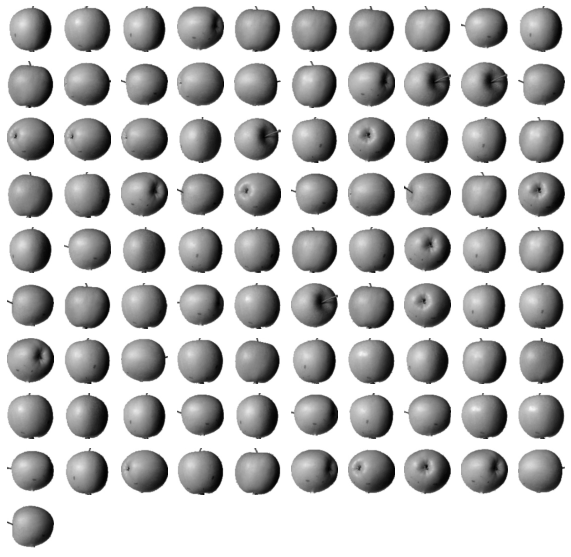

In [ ]:
# 0번 레이블에 들어있는 그림 그리기
draw_fruits(fruits[km.labels_==0])

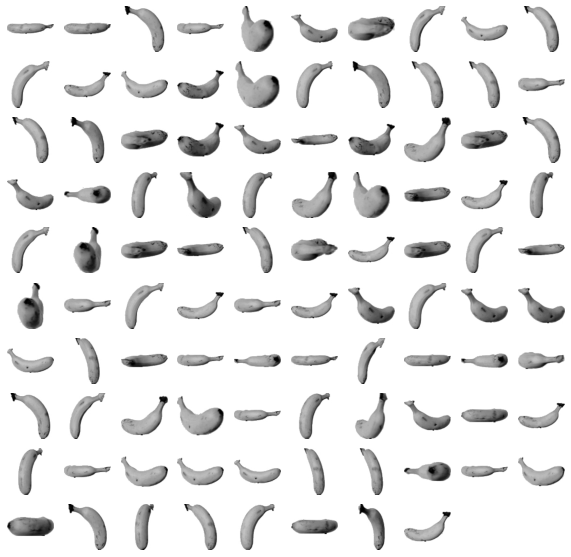

In [ ]:
# 1번 레이블 출력하기
draw_fruits(fruits[km.labels_==1])

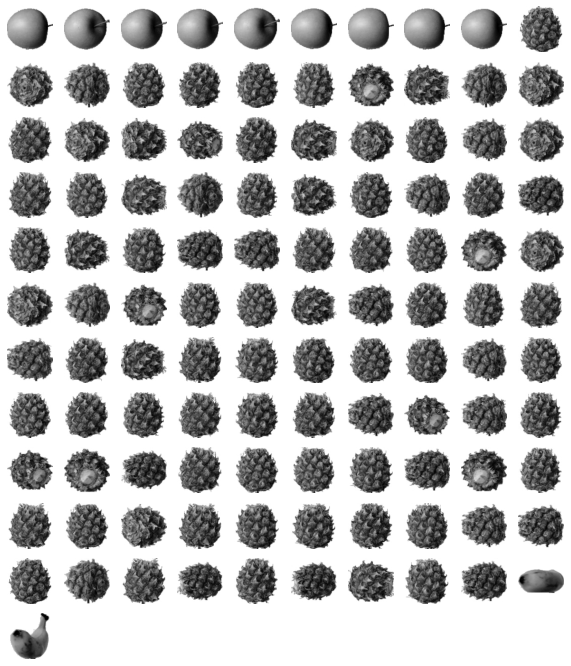

In [ ]:
# 2번 레이블 출력하기
draw_fruits(fruits[km.labels_ ==2])

(3, 10000)


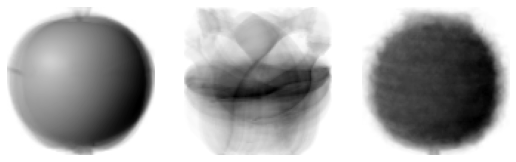

(3, 100, 100)


In [ ]:
# KMeans 클래스가 최종적으로 찾은 클로스터 중심은 cluster_centers_ 속성에 저장되어 있다.
# 이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 이미지로 출력하려면 100 x 100 크기의 2차원 배열로 바꿔야 한다.
print(km.cluster_centers_.shape)
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)
print(km.cluster_centers_.reshape(-1,100,100).shape)

In [ ]:
# transform() : 훈련데이터 샘플에서 클러스터 줌심까지 거리로 변환해주는 메서드
# fit 메서드와 마찬기자로 2차원 배열을 기대한다.
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


첫번째 클러스터 까지의 거리는 5267

두번째 클러스터 까지의 거리는 8837

세번재 클러스터 까지의 거리는 3393 

이므로 이 샘플은 레이블 2에 속하게 된다.

In [ ]:
# predict 메서드는 가장 가까운 클러스터 중심을 예측 클래스로 출력
print(km.predict(fruits_2d[100:101]))

[2]


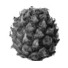

In [ ]:
draw_fruits(fruits[100:101])

[[2641.34592861 9030.55531495 5363.9344124 ]]
[0]


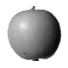

In [ ]:
print(km.transform(fruits_2d[1:2]))
print(km.predict(fruits_2d[1:2]))
draw_fruits(fruits[1:2])

### 2) 최적의 K 찾기

위의 문제에서는 타깃값의 정보를 활용하여 3으로 지정하였다.

그러나, 실전에서는 k 개수를 알 수 가 없다. 어떻게 해결할 수 있을까??

여러가지 방법중 **엘보우(elbow)** 방법에 대해 알아보자.

엘보우 방법은 **이너셔(inertia)** 를 활용해 적절한 k 값을 찾는다.

**이너셔 (inertia)**

클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱 합.

일반적으로 클러스터의 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 대문에
이너셔도 줄어돈다.



**엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법**

![](https://editor.analyticsvidhya.com/uploads/43191elbow_img%20(1).png)

 elbow point가 확 꺾이는 지점이 k 가 된다.

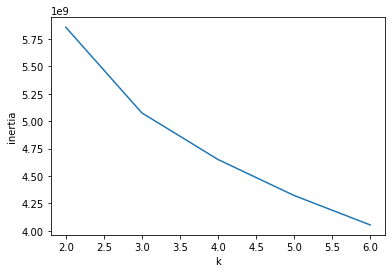

In [ ]:
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 3. 주성분 분석 (PCA, Principle Component Analysis)


![](https://miro.medium.com/max/1200/0*J-m5zAEFGOs-qnLo.png)



데이터를 가장 잘 설명할 수 있는 일부 특성을 선택하여 데이터의 크기를 줄이고 학습보델을 향상시킬 수 있는 차원축소 알고리즘 .

 새로운 특성인 서로 직교하는 **주성분** 벡터로 데이터를 설명함.  

In [1]:
# 코드 쉘에서 '!' 문자로 시작하면 코랩은 리눅스 쉘 명령으로 이해한다. 
# 영어 대문자 O 임 
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

# k-평균 모델을 훈련하기 위해 (샘플 개수, 너비, 높이) 크기의 3차원 배열을
# (샘플개수, 너비 x 높이) 크기를 가진 2차원 배열로 변경

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2021-08-17 09:02:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-08-17 09:02:02--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-08-17 09:02:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [7]:
from sklearn.decomposition import PCA
# n_components: 매개변수에 주성분의 개수를 지정
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(fruits_2d.shape)
print(pca.components_.shape)

(300, 10000)
(50, 10000)


In [4]:
pca.components_

array([[ 9.24490195e-06,  5.10601298e-06,  8.91640398e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.69701619e-05, -1.13551049e-05, -1.82152568e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.65220446e-05, -2.08401731e-05, -2.89870125e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 2.68042607e-06,  6.48714582e-05,  4.56275477e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.25602213e-05,  1.02518921e-04,  1.39732965e-04, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-8.95465938e-05,  3.95224159e-05,  3.25313475e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [5]:
# 각 레이블의 이미지를 출력하기
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  # n은 샘플개수 
  n = len(arr)
  # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
  rows = int(np.ceil(n/10))
  # 행이 1개면 열의 개수는 샘플 개수다. 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n :
        axs[i,j].imshow(arr[i*10 + j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

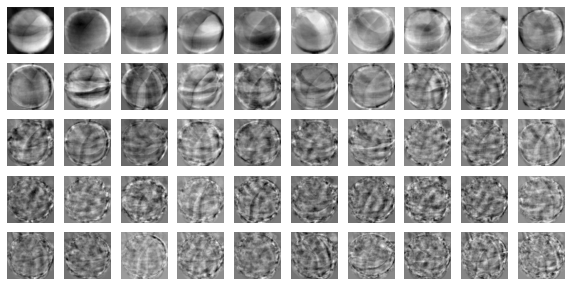

In [6]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [8]:
#주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.
#원본데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [11]:
# 데이터 되돌리기
# inverse_transform() 메서드로 데이터를 복원할 수 있다.
# Raw 데이터로 만들어주는 것이 아니라 주성분을 사용해 재조립해준다,
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


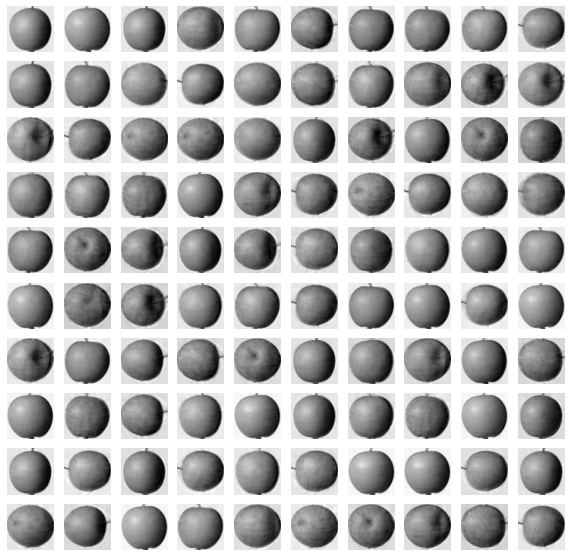

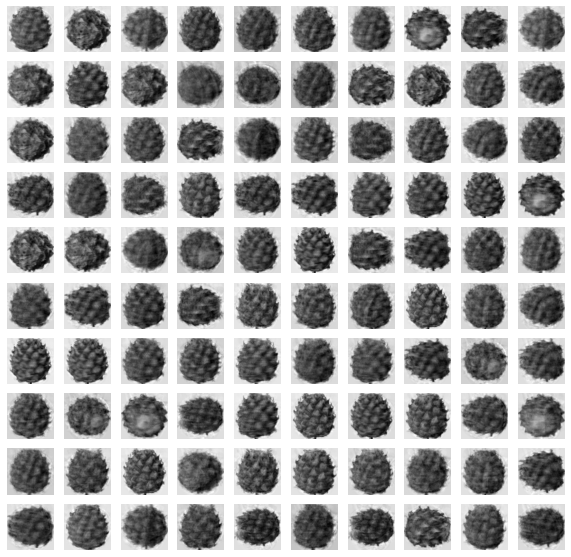

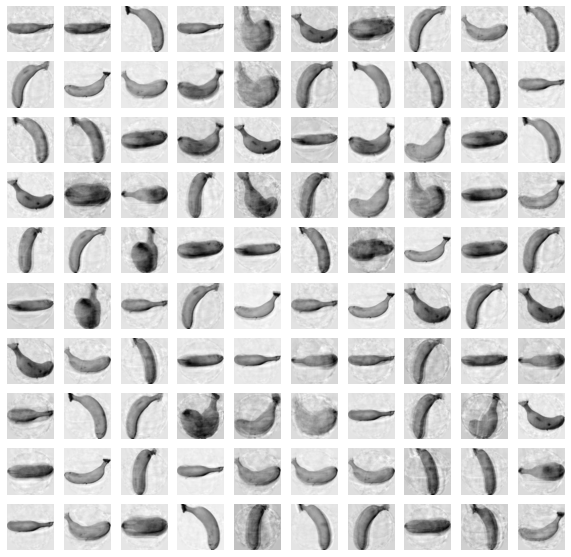

In [12]:
fruits_reconstruct= fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

**설명된 분산 (Explained Variance)**

주성분이 원보 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

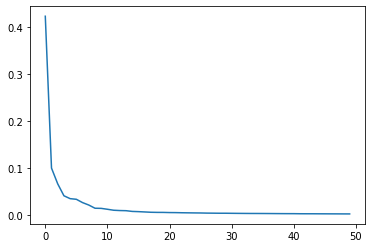

0.9214876979453831


In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
print(np.sum(pca.explained_variance_ratio_))

10개의 주성분이 대부분의 분산을 표현하고 있다.

**다른 알고리즘과 함께 사용하기**

로지스틱 회귀 모델을 사용하여 원본 데이터와 PCA로 축소한 데이터에 어떠한 차이가 있는지 알아보자

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 로지스틱 회귀를 사용하기 위한 타깃값 만들기
# 사과를 0 / 파인애플을 1 / 바나나를 2
target = np.array([0]*100 + [1]*100 + [2]*100)

# 교차검증을 통해 모델평가
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# pca로 축소한 교차검증 모델 평가
scores_pca = cross_validate(lr, fruits_pca, target)
print(np.mean(scores_pca['test_score']))
print(np.mean(scores_pca['fit_time']))


0.9966666666666667
1.5171291828155518
1.0
0.03499927520751953


In [21]:
# PCA 클래스를 사용할 때 원하는 설명된 분산의 비율을 입력할 수 도 있음.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [23]:
# 2개의 주성분을 활용해 만든 데이터로 KMean 해보기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores_pca_2 = cross_validate(lr, fruits_pca, target)
print(np.mean(scores_pca_2['test_score']))
print(np.mean(scores_pca_2['fit_time']))


(300, 2)
0.9933333333333334
0.048690414428710936


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


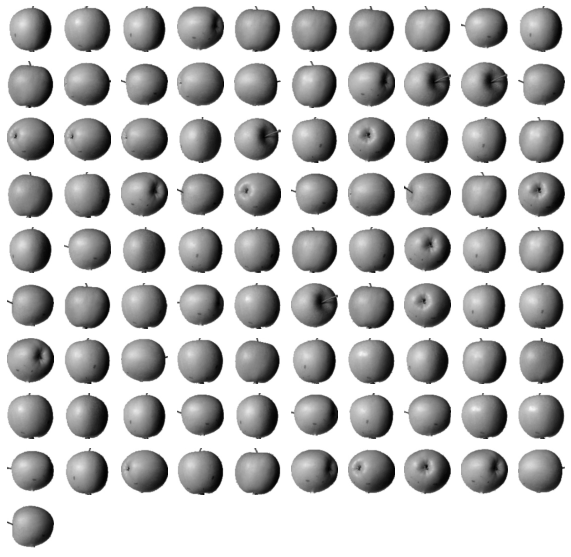

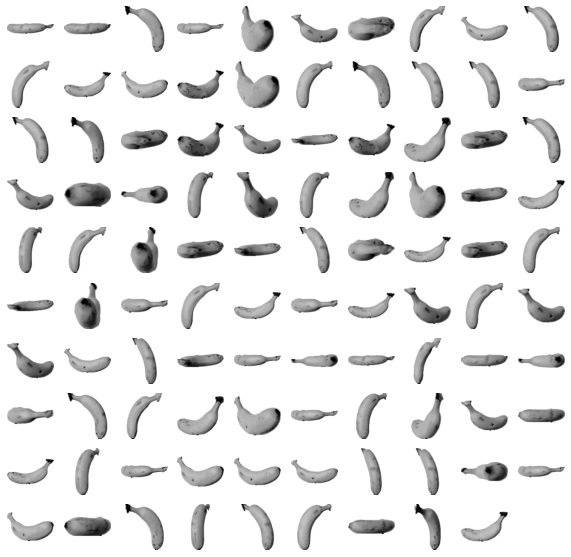

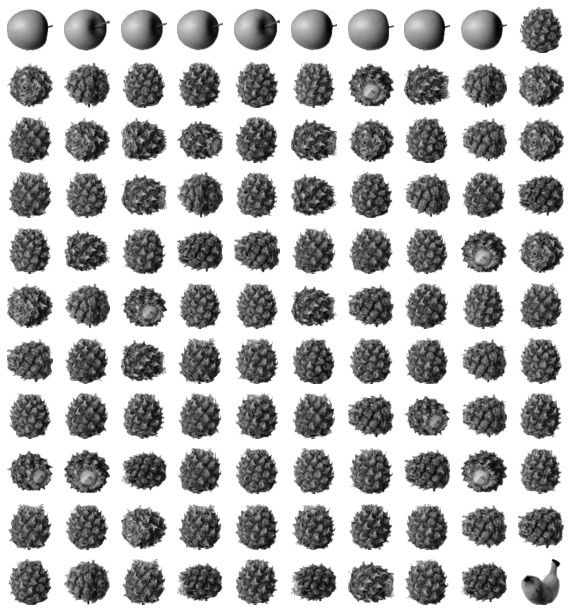

In [27]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

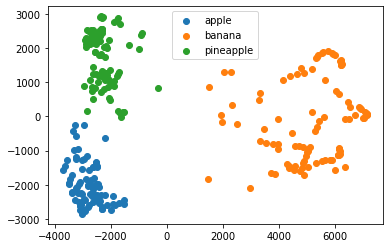

In [32]:
# 주성분을 3개 이하의 차원으로 나타내면 화면에 출력하기 쉽다. (시각화가 용이함)
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()